In [54]:
from google.colab import drive
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [78]:
# utilizado para manejos de directorios y rutas
import os
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

In [82]:
# Cargar el dataset
data = pd.read_csv('/content/gdrive/MyDrive/SIS420 Inteligencia Artificial/SegundoSemestre/Dataset/dielectron.csv', header=0, delimiter=',')

# Eliminar filas con valores NaN
data = data.dropna()

# Seleccionar las columnas 'pt1' y 'M'
X = data['pt1'].values.reshape(-1, 1)
y = data['M'].values

# Verificar si hay valores NaN después de la limpieza
print("Número de valores NaN en X:", np.isnan(X).sum())
print("Número de valores NaN en y:", np.isnan(y).sum())


Número de valores NaN en X: 0
Número de valores NaN en y: 0


In [83]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)


LinearRegression()

In [84]:
# Predecir con los datos de prueba
y_pred = lin_reg.predict(X_test)

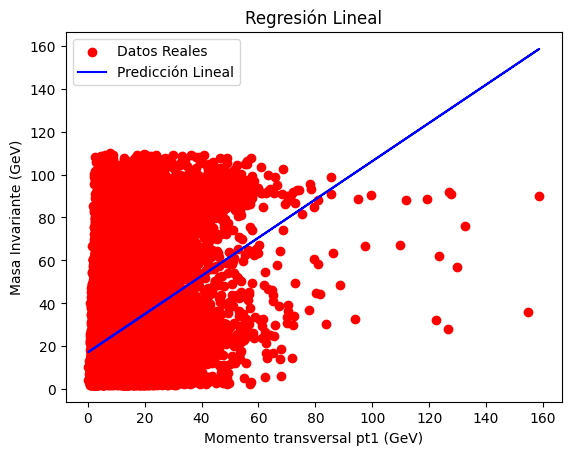

In [85]:
# Graficar resultados
plt.scatter(X_test, y_test, color='red', label='Datos Reales')
plt.plot(X_test, y_pred, color='blue', label='Predicción Lineal')
plt.xlabel('Momento transversal pt1 (GeV)')
plt.ylabel('Masa Invariante (GeV)')
plt.title('Regresión Lineal')
plt.legend()
plt.show()


In [86]:
print(f"Coeficientes: {lin_reg.coef_}")
print(f"Intercepto: {lin_reg.intercept_}")

Coeficientes: [0.89105498]
Intercepto: 17.11200152765887


<h1>REGRESION POLINOMICA</h1>

In [61]:
# Añadir término cuadrático para regresión polinómica
X_poly = np.column_stack((X, X**2))

In [62]:
print(X_poly)

[[ 12.8202     164.35752804]
 [  4.19242     17.57638546]
 [ 11.661      135.978921  ]
 ...
 [  3.28801     10.81100976]
 [ 16.4328     270.03691584]
 [  5.5501      30.80361001]]


In [63]:
# Normalización de características
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

In [64]:
X_norm, mu, sigma = featureNormalize(X_poly)


In [65]:
# Añadir columna de unos para el término de intercepto
X_norm = np.column_stack((np.ones(X_norm.shape[0]), X_norm))

In [66]:
print(X_norm)

[[ 1.         -0.12896264 -0.2687593 ]
 [ 1.         -0.82524824 -0.46893846]
 [ 1.         -0.22251327 -0.30746186]
 ...
 [ 1.         -0.89823662 -0.47816504]
 [ 1.          0.16258413 -0.12463445]
 [ 1.         -0.71567973 -0.45089926]]


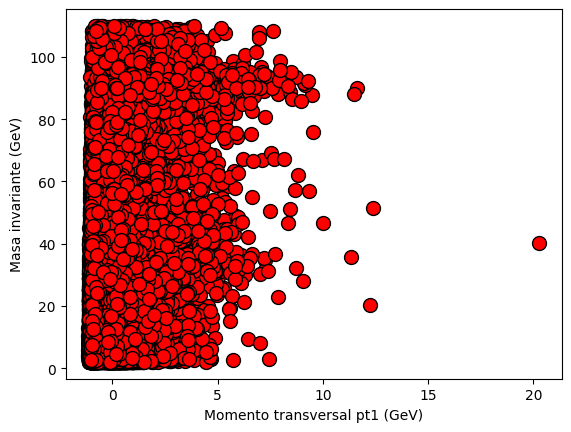

In [67]:
plotData(X_norm[:,1], y)

In [68]:
# Función de costo para regresión multivariable
def computeCostMulti(X, y, theta):
    m = y.shape[0]
    J = (1/(2 * m)) * np.sum(np.square(X.dot(theta) - y))
    return J


In [69]:
# Función de descenso por gradiente
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = []

    for i in range(num_iters):
        theta -= (alpha / m) * X.T.dot(X.dot(theta) - y)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history


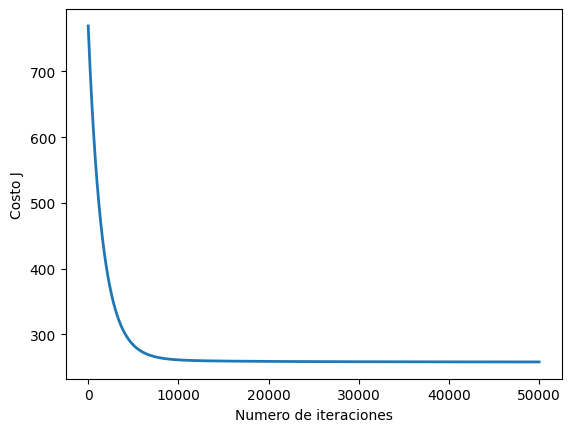

theta calculado por el descenso por el gradiente: [30.01951212 10.68574496  0.30664421]


In [72]:
# Inicializar parámetros
alpha = 0.0003
num_iters = 50000
theta = np.zeros(3)

# Ejecutar el descenso por gradiente
theta, J_history = gradientDescentMulti(X_norm, y, theta, alpha, num_iters)

# Graficar convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Mostrar resultados del descenso por gradiente
print(f'theta calculado por el descenso por el gradiente: {theta}')

In [73]:
# Predecir la masa invariante para un valor dado de pt1
pt1_value = 20  # Cambia este valor para predecir para un pt1 diferente
X_array = [1, pt1_value, pt1_value**2]
X_array[1:] = (X_array[1:] - mu) / sigma
predicted_mass = np.dot(X_array, theta)

print(f'La masa invariante predicha para pt1 = {pt1_value} GeV es: {predicted_mass:.2f} GeV')


La masa invariante predicha para pt1 = 20 GeV es: 34.85 GeV


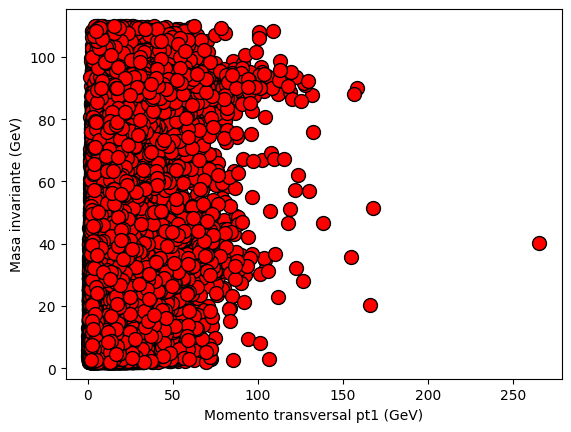

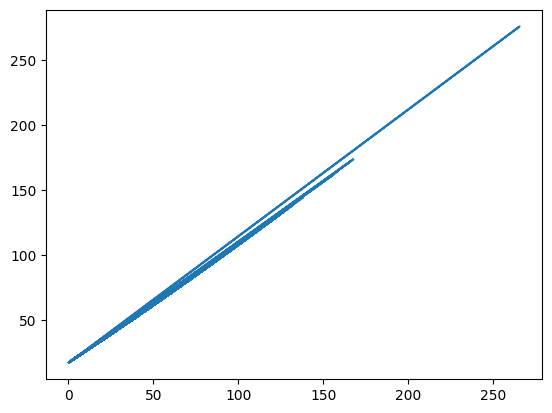

In [77]:
# Graficar la línea de ajuste
plotData(X, y)
plt.plot(X, X_norm[:, 1:].dot(theta[1:]) + theta[0], '-')
plt.show()

In [ ]:
X_array[1:3]
print(np.dot(X_array, theta))